# Delayed-choice eraser paradox with Qiskit: why can't we influence the past? 

Welcome to the code tutorial for the “Delayed-Choice Quantum Eraser” installment of the Paradoxes series on the Qiskit YouTube channel. In this tutorial, we’ll resolve the quantum eraser paradox, which seems to suggest that a decision you make now can affect the behavior of a particle in the past. To do this, we'll  simplify the original thought experiment into a quantum circuit that we can simulate with Qiskit!

If you haven't already, I recommend you first watch [our video](https://youtu.be/Bb0hAo9Kp3w) on the Qiskit YouTube channel, which explains the context of the thought experiment and provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. I also suggest reading the blog post (link coming soon) for a deeper look at the background of the thought experiment.

Let's summarise the thought experiment, simulating each step using Qiskit code:

**Summary of delayed-choice eraser thought experiment**

Could a decision you make right now influence the past? The delayed-choice quantum eraser thought experiment seems to suggest that it can. It claims that your decision about how to measure a quantum system right now, could affect whether it behaved like a particle or a wave in the past — whether that past was seconds ago, or years ago.

The quantum eraser is a variation of the double slit thought experiment. I recommend watching my previous video to understand the double slit thought experiment and how to implement it on a quantum computer, but I'll recap the double slit experiment now before we dive in to the quantum eraser: 

When you send single photons through a double slit one by one, and measure where they land on a screen, you get an interference pattern. There are some bright spots, where the photon's quantum amplitude added together, and some dark spots, where the photon's quantum amplitude cancelled out. The single photons each behave like a water wave, going through both slits at the same time, then interfering with itself. 

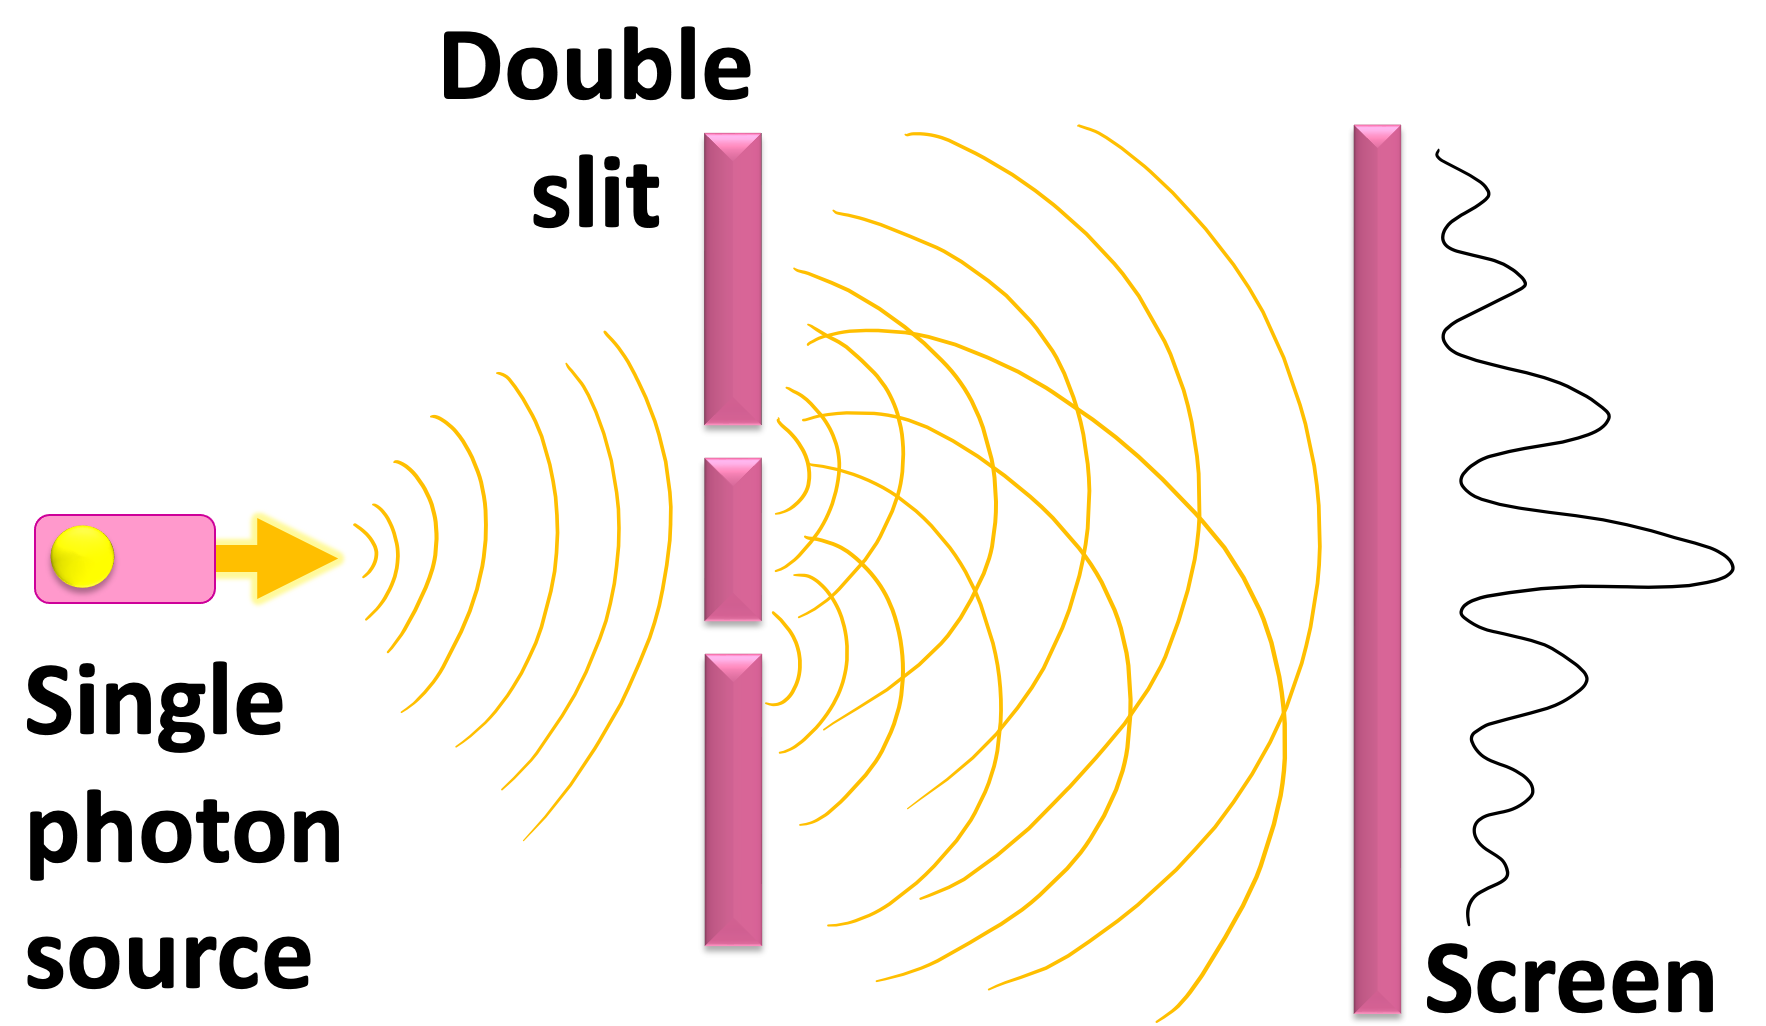

However, if we measure which slit the photon went through, before it reaches the screen, then the interference pattern on the screen disappears. We just see two bright spots in front of each slit, as though we flipped a coin each time to send the photon through just one slit or just the other slit. It's like sending a water wave through each slit individually in turn: there is no interference. 

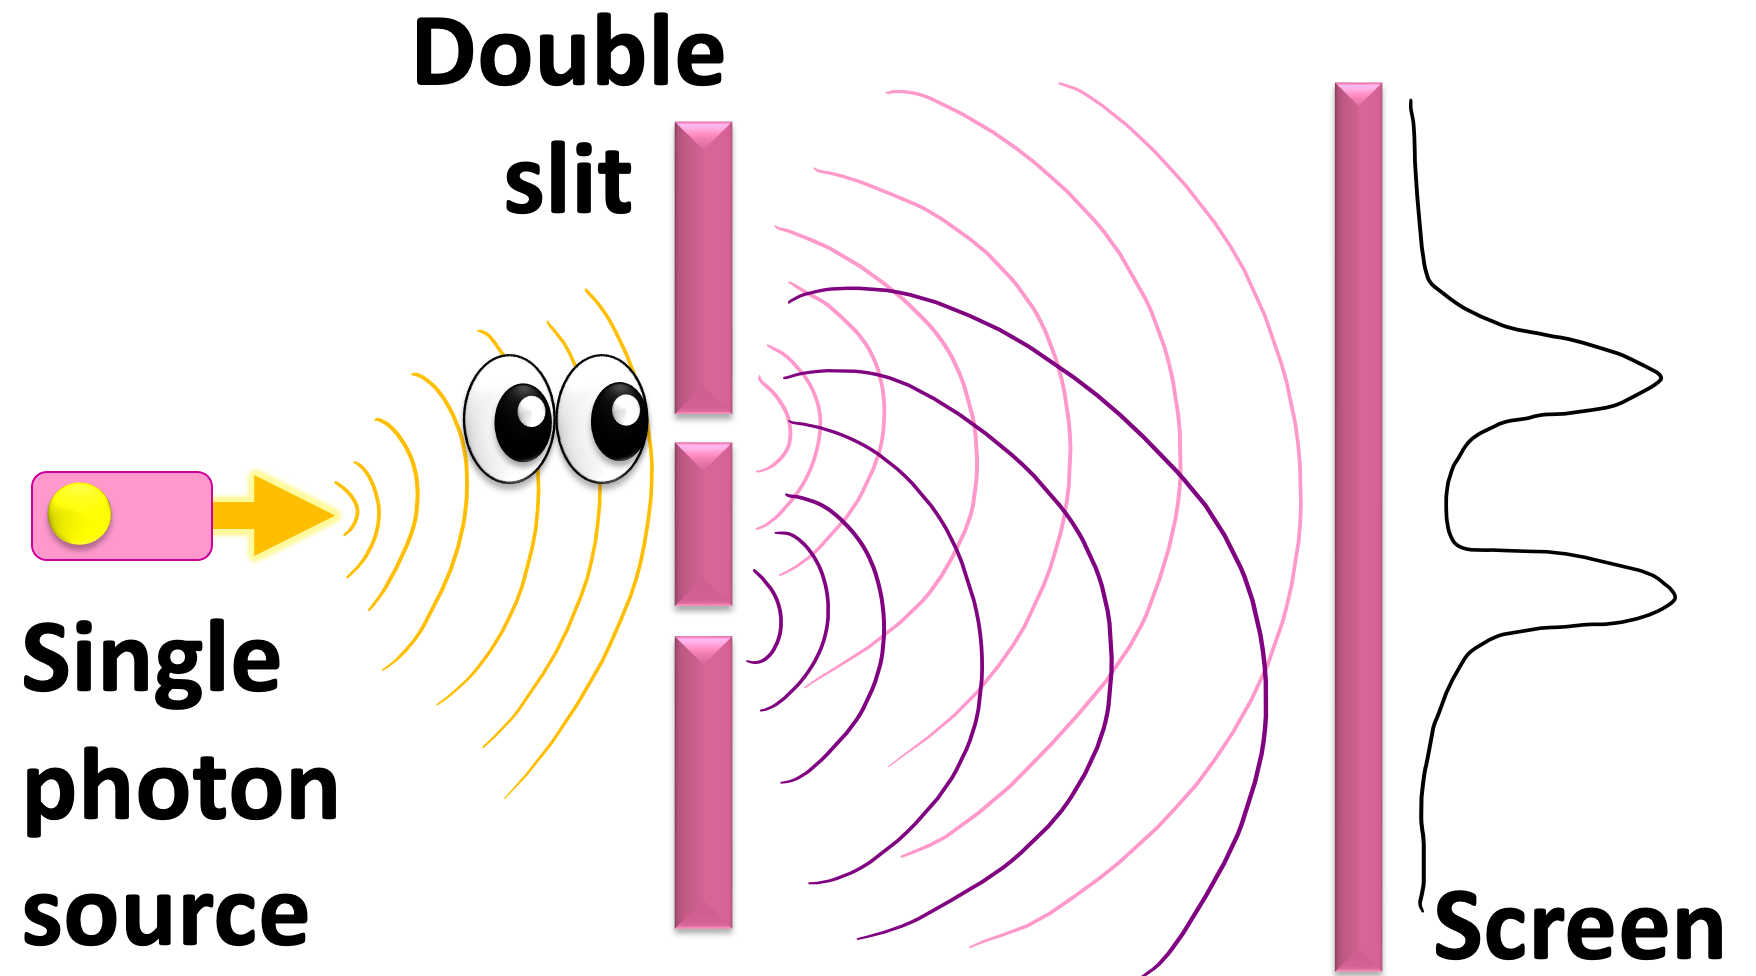

Now let's add another twist: instead of measuring which slit the photon went through with a classical detector, we let a small, controlled quantum system interact with each photon as it passes through the slits. Let's call this our quantum detector. We have a choice in how to extract information from our quantum detector. We can either measure it in a basis that will tell us which slit the photon went through, or we can measure it in a basis that gives us zero information about which slit the photon went through. Crucially, we can decide whether or not to extract the information about which slit the photon went through any time we want — including years after running the experiment and letting all the photons hit the screen. 

Now, what do we expect to see on the screen in this experiment — an interference pattern, or no interference pattern? Just by letting the quantum detector interact with each photon going through the double slit, we've destroyed the standard double-slit interference pattern from the screen. This makes intuitive sense. We have the potential to extract information about which way the photon went from the quantum detector, even though we haven't extracted that information yet, so we should see the same destruction of the interference pattern that we observe when we use a classical detector to check which way the photon went. 

But here's the tricky part: we could also do the measurement on our quantum detector that destroys the information about which way the photon went. It turns out we can use the results of this measurement to extract an interference pattern from the screen. Let's say that the measurement of our quantum detector gives two outcomes, 0 or 1. If we take all the photon hits on the screen that correspond with a value of 0 on the quantum detector, and separate them from those that correspond with a value of 1 on the quantum detector, then we see interference patterns in these two separate patterns on the screen!

The two patterns on the screen are exactly out of phase, so the blue pattern is high when the red pattern is low, and vice-versa. This is how they can add up to look like the single-particle pattern with no interference. 

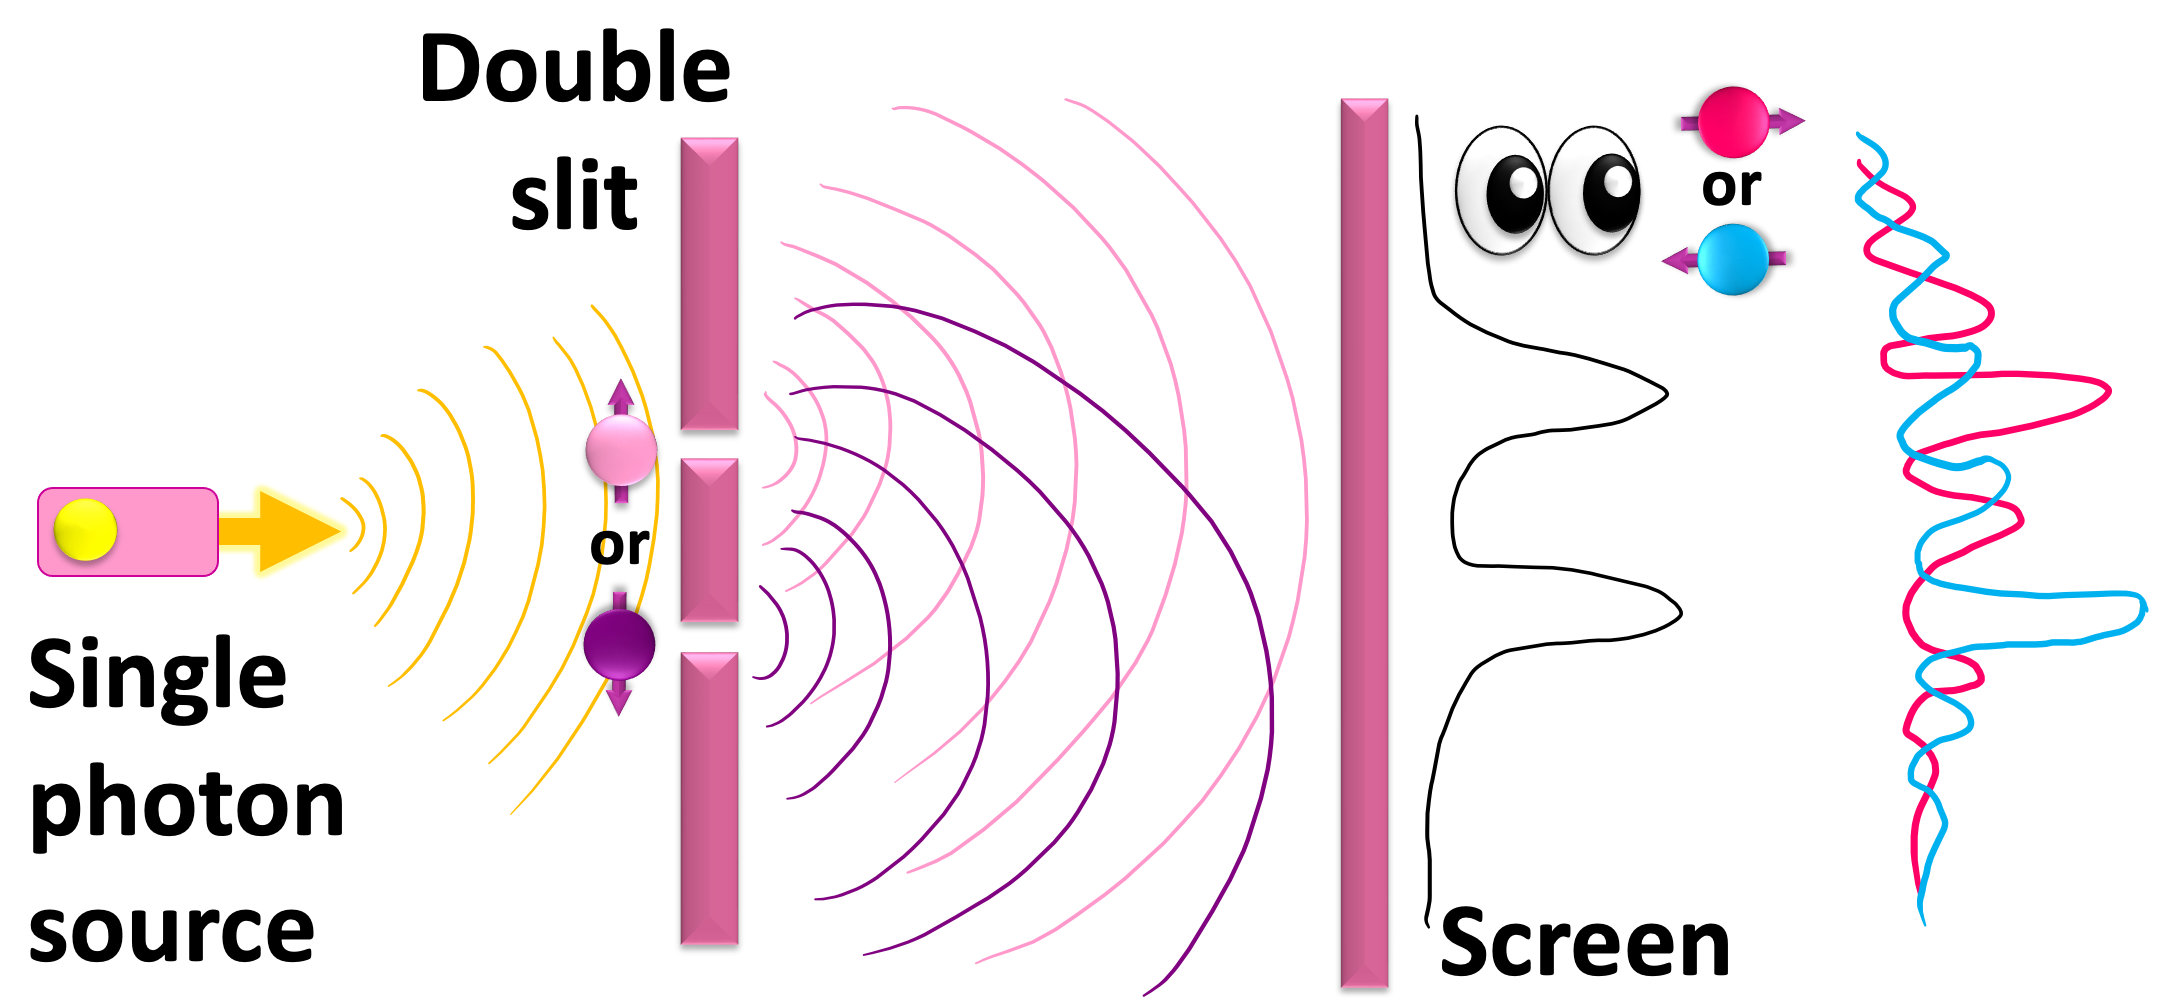

So, if we choose to measure our detector qubit in a way that destroys the information about which slit the photon went through, we retrieve information that enables us to extract interference patterns. Since each photon was sent through the slit individually, it seems like the photons were actually able to interfere with themselves and passed through both slits. 

This strange behavior seems to suggest the following paradox: 
- By choosing how to measure our quantum detector qubit, which we can do long after the photons hit the screen, we appear to be able to determine whether or not each photon behaved as though it went through a single slit (behaving like a particle) or both slits (behaving like a wave).
- This implies that we are able to influence the past of the photon by actions we do in the present: a paradox! 

### From slits to beamsplitters

To resolve the paradox, we will start by expressing it using beamsplitters and photon detectors. We're going to use a standard setup for investigating whether a photon has interfered with itself or not, known as a Mach-Zender interferometer. If you've seen my double-slit video or quantum bomb-tester video before, you'll be familiar with this already. 

We first send a single photon through a beamsplitter, which puts the photon into an equal superposition of being reflected and being transmitted straight through. We then use mirrors to guide both parts of the photon in superposition to meet again at a second beamsplitter. They constructively interfere, merging back into one photon, which is transmitted straight through the second beamsplitter and detected by a photon detector. If we send lots of individual photons through this setup, they will always be detected as being transmitted at the second beamsplitter. This is analogous to seeing the full series of bright spots and dark spots on the screen that indicate single-photon interference in the double slit experiment. 

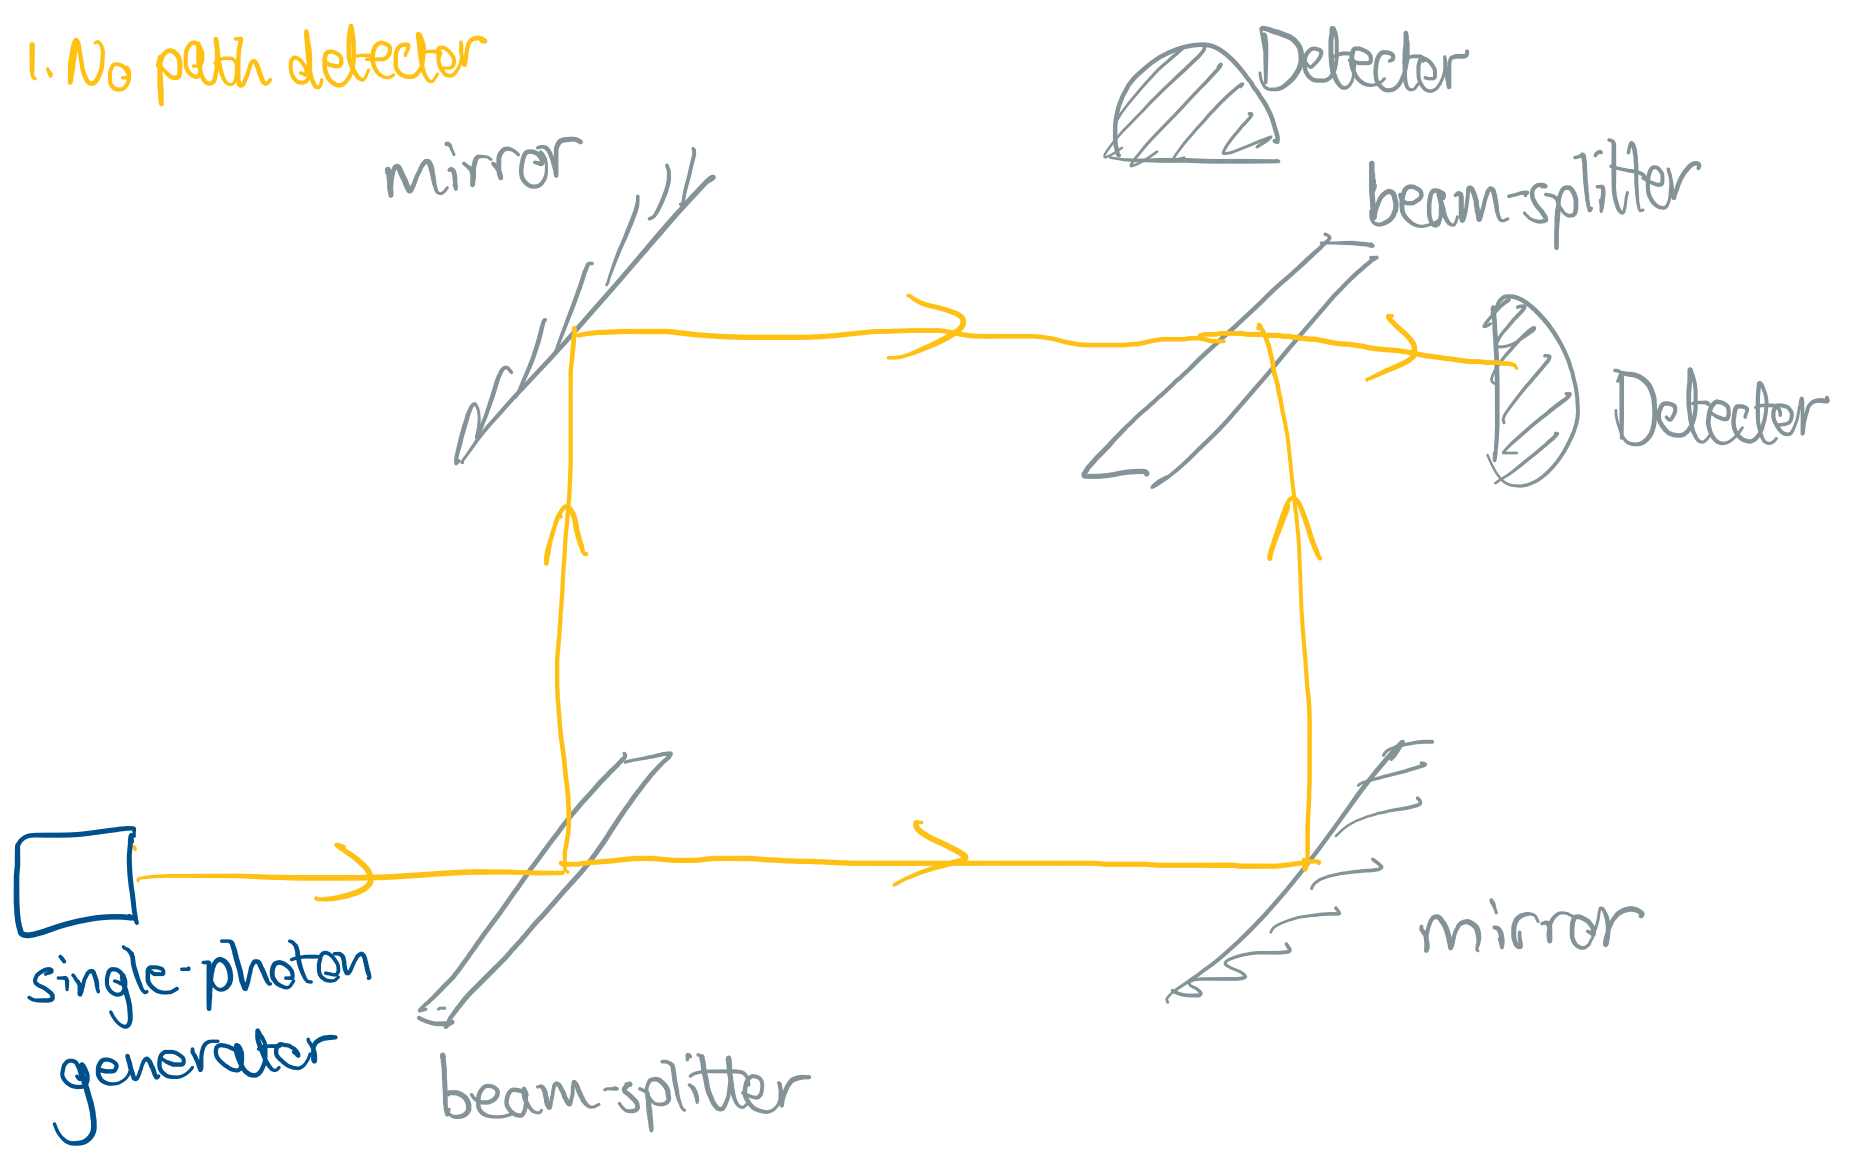

Now, if we introduce a detector to measure which path the photon took, it will be projected into either the top path or the bottom path, and it is no longer able to interfere with itself at the second beamsplitter. Hence, it will be split into an equal superposition of being reflected and transmitted, meaning half the photons will be detected as being reflected, and half as being trasmitted. This is analogous to seeing just the two bright spots on the screen that indicate no interference of photons with themselves in the double-slit experiment. 

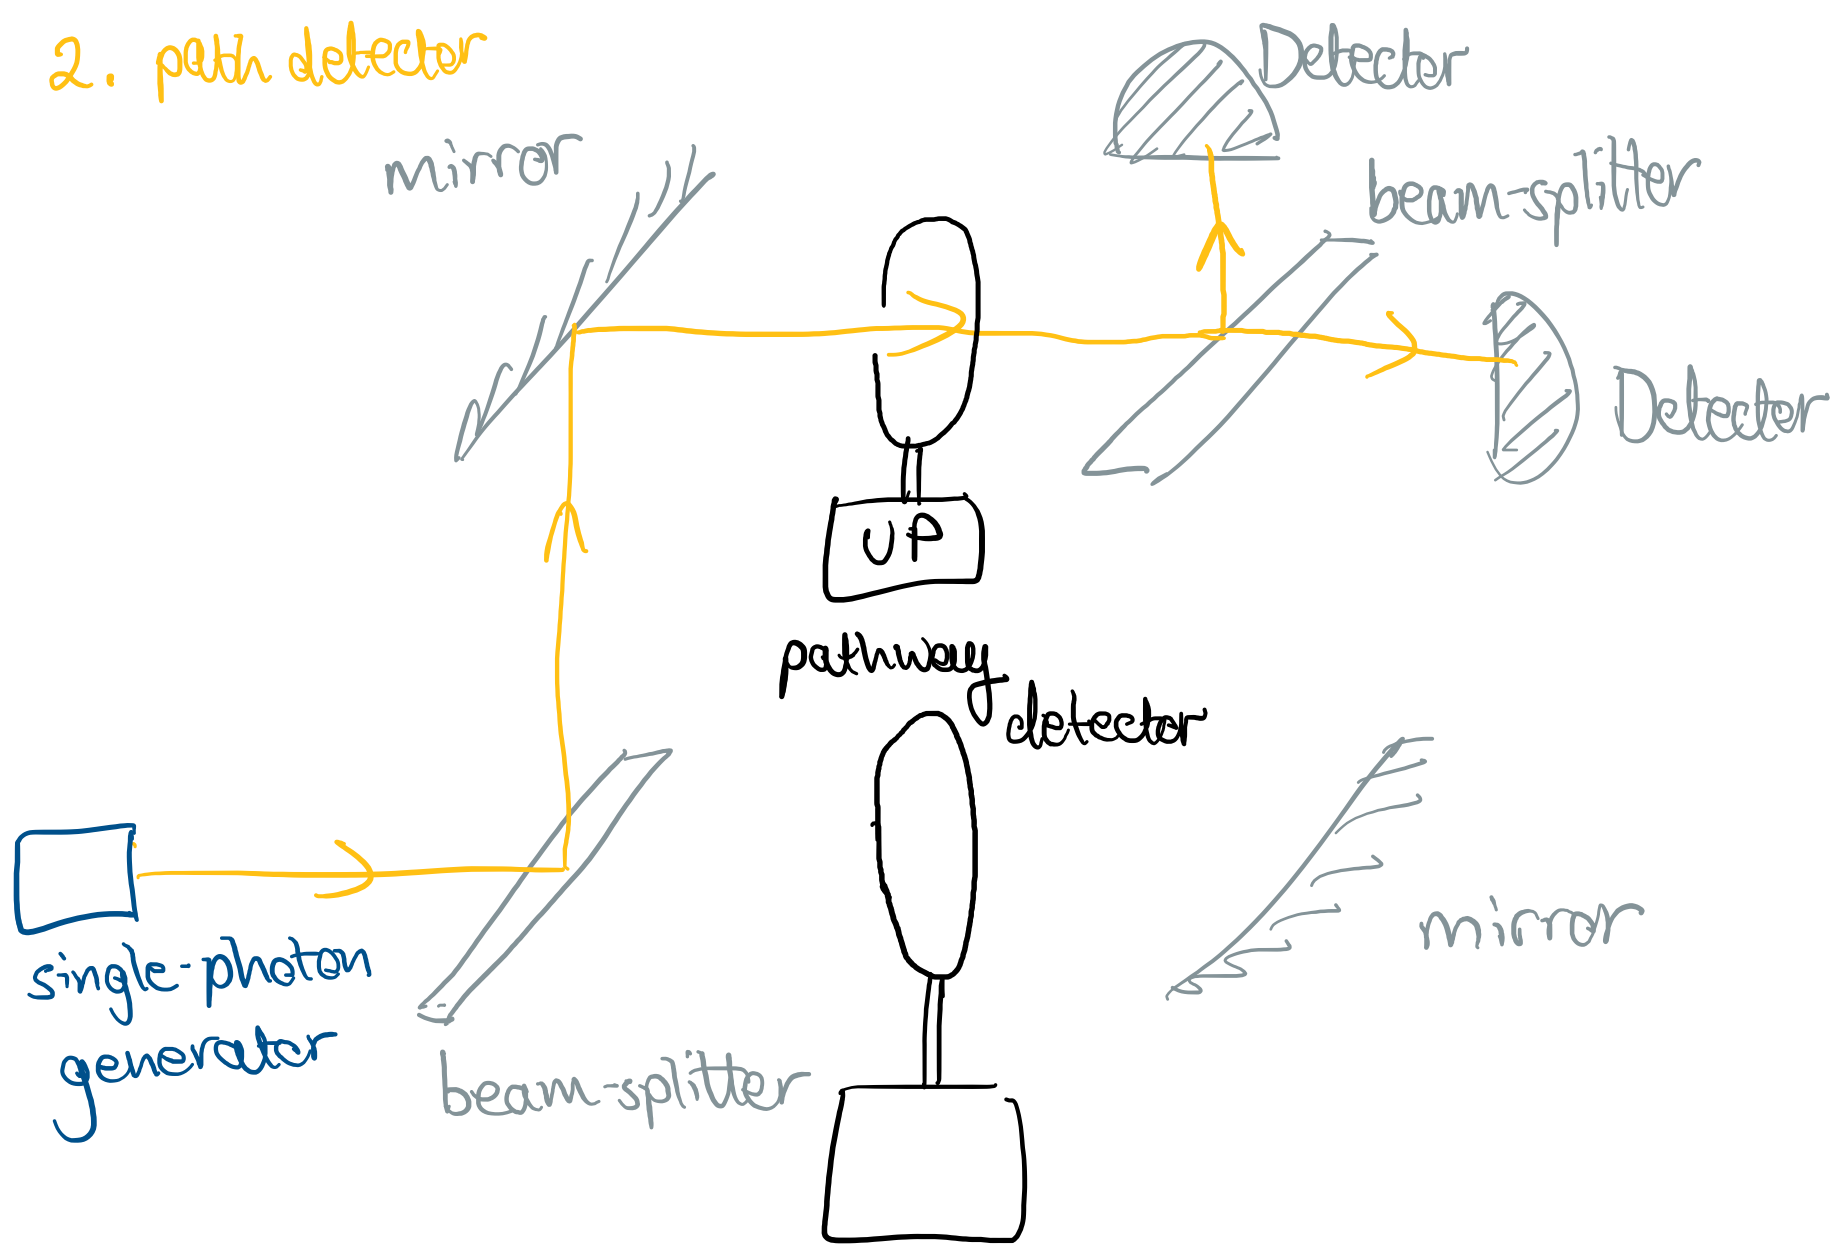

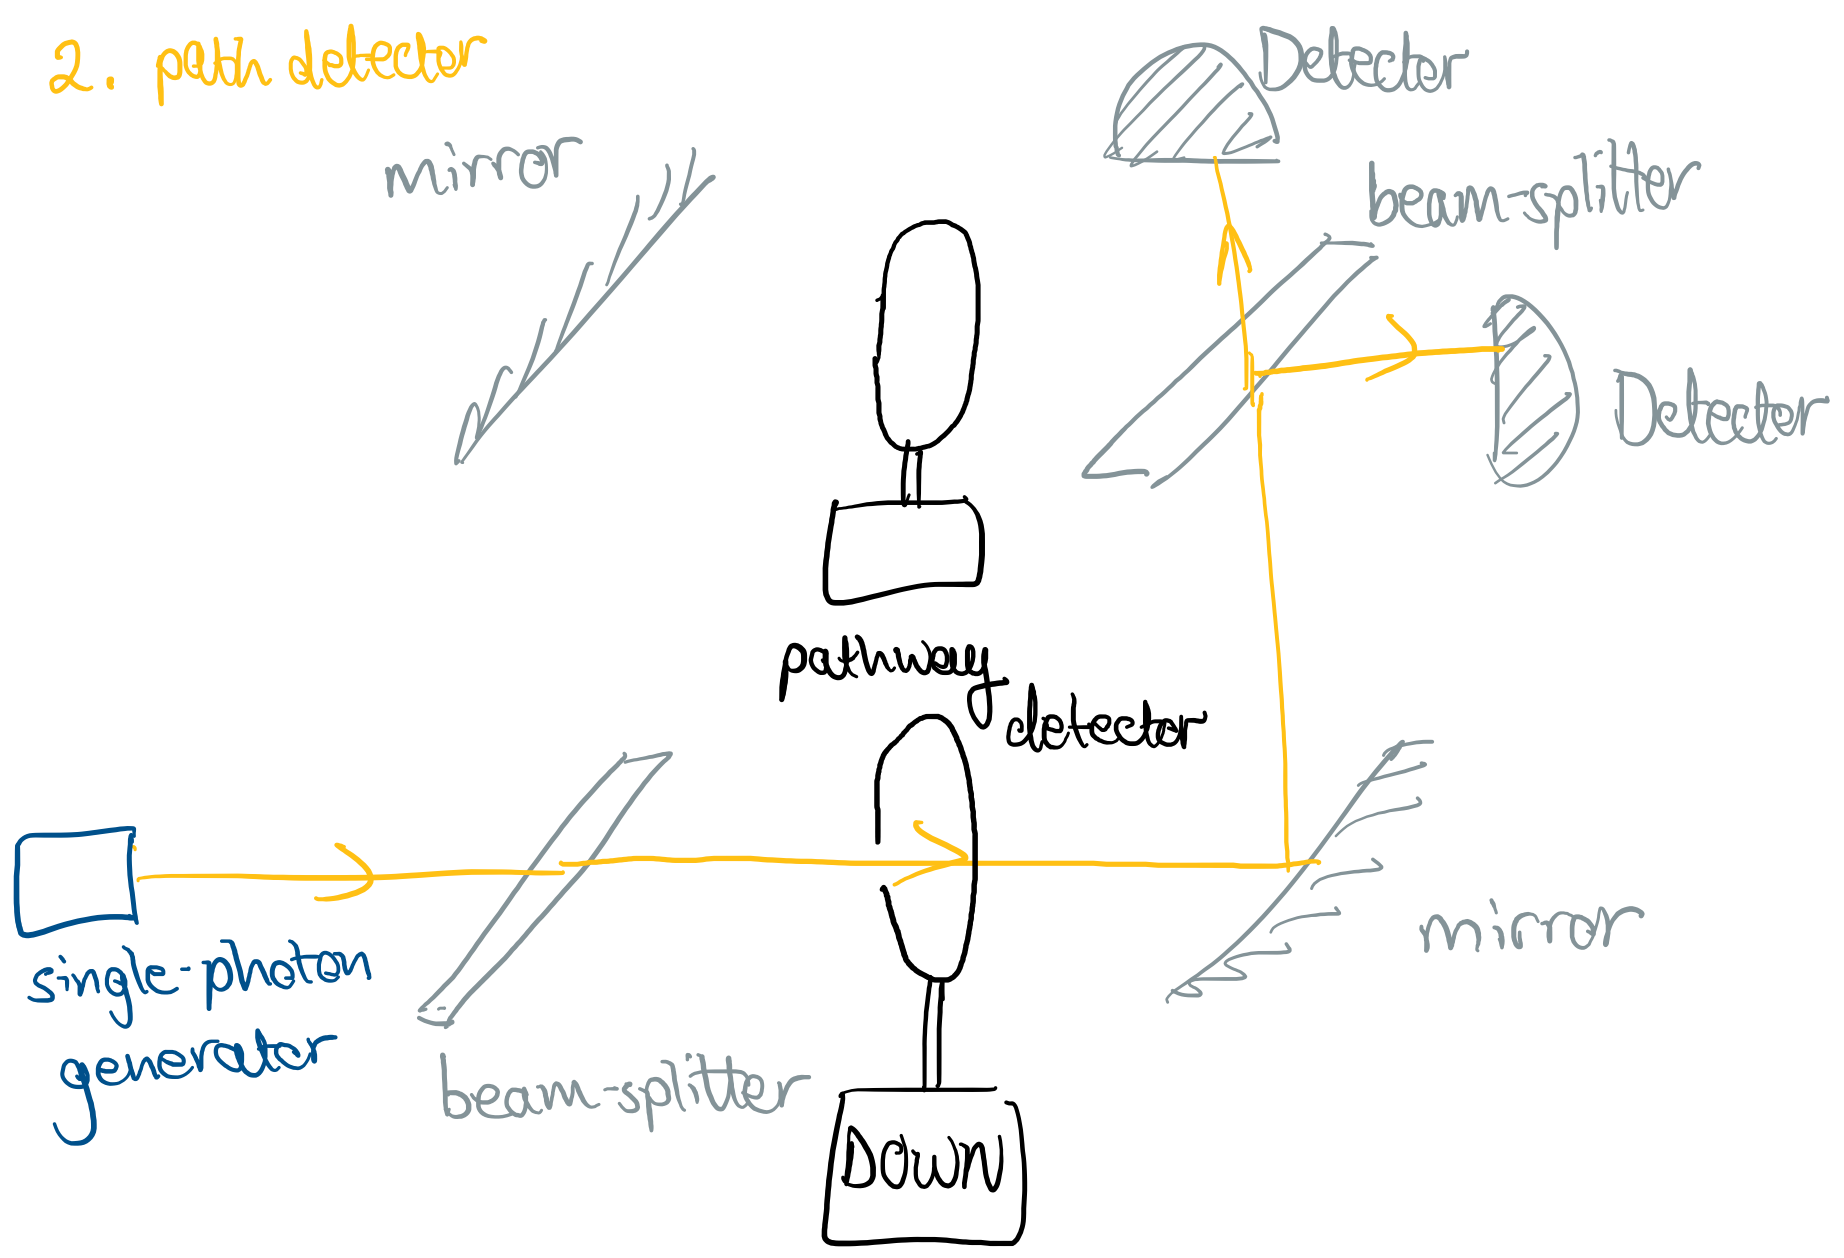

We can express both of these scenarios as simple quantum circuits: the photon is a qubit, the beamsplitters are Hadamard gates, and the path detector and final screen are both measurements:

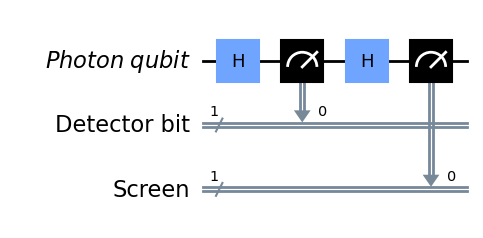

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name="Photon qubit")
cr2 = ClassicalRegister(1, name="Detector bit")
cr1 = ClassicalRegister(1, name="Screen")

qc= QuantumCircuit(qr1, cr2, cr1)
qc.h(0)
qc.measure(0,0)
qc.h([0])
qc.measure(0,1)

qc.draw("mpl")

In [2]:
from qiskit_aer import AerSimulator 
backend = AerSimulator()
result = backend.run(qc).result()
counts = result.get_counts(qc)
print(counts)

{'0 1': 272, '0 0': 243, '1 1': 247, '1 0': 262}


I recommend watching my [double-slit video](https://youtu.be/CI41yWg38Oo?si=XOxbkGJP-JKPlQrr) if you haven't already, to see how the outcomes of these circuits map to the double-slit experiment. 

The key take-away is that with no mid-circuit-measurement, the "screen" always measures the photon qubit to be in the 0 state, signalling that the photon qubit interfered with itself. By contrast, with a mid-circuit measurement from a "detector", the "screen" measures the photon qubit to be in a mixture of 0 and 1. This indicates that the detection of the photon qubit's state caused it to decohere.

### Introducing the detector qubit 

The twist with the quantum eraser is that instead of directly adding a classical measurement to see which path the photon went through, we let the photon interact with a controlled quantum system. We can choose to measure this later to find out which path the photon went through. 

To model this quantum detector in our quantum circuit, we will introduce an additional qubit into the circuit, called the quantum detector. Then, instead of adding a classical measurement after the first Hadamard gate, we will add a CNOT gate between the photon qubit and the detector qubit. After that, we apply the second Hadamard gate to the photon qubit and the final measurement of the photon, as before: 

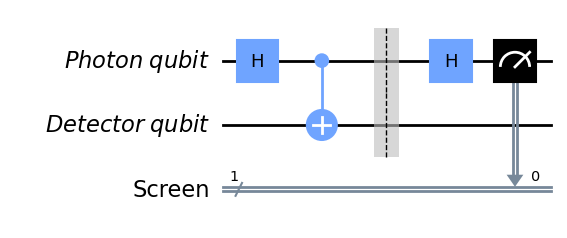

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name="Photon qubit")
qr2 = QuantumRegister(1, name="Detector qubit")
cr1 = ClassicalRegister(1, name="Screen")

qc= QuantumCircuit(qr1, qr2, cr1)
qc.h(0)
qc.cx(0,1)

qc.barrier()

qc.h([0])
qc.measure(0,0)

qc.draw("mpl")

Let's see what happens to the outcome of our photon qubit when we run this circuit: 

In [4]:
result = backend.run(qc).result()
counts = result.get_counts(qc)
print(counts)

{'1': 516, '0': 508}


There's an equal chance of getting 0 and 1, indicating that there is no interference pattern. 

We now have a choice to make in how we measure the detector qubit. One option would be to apply a standard Z-measurement of the detector qubit after the screen measurement:

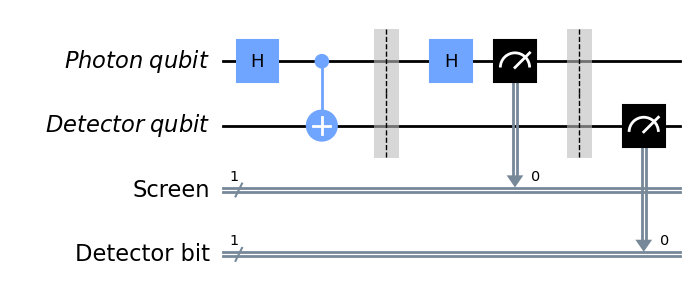

In [5]:
qc2= QuantumCircuit(qr1, qr2, cr1, cr2)
qc2.h(0)
qc2.cx(0,1)

qc2.barrier()

qc2.h([0])
qc2.measure(0,0)

qc2.barrier()

qc2.measure(1,1)

qc2.draw("mpl")

Let's run this to extract information about whether the photon went through the top path or the bottom path: 

In [6]:
result = backend.run(qc2).result()
counts = result.get_counts(qc2)
print(counts)

{'0 1': 271, '1 0': 254, '0 0': 248, '1 1': 251}


We get a random mix of all possible measurement outcomes. There's no way we can extract an interference pattern here.

Now let's see what happens if instead of making a Z-measurement on the detector qubit, we make an X-measurement on the detector qubit: 

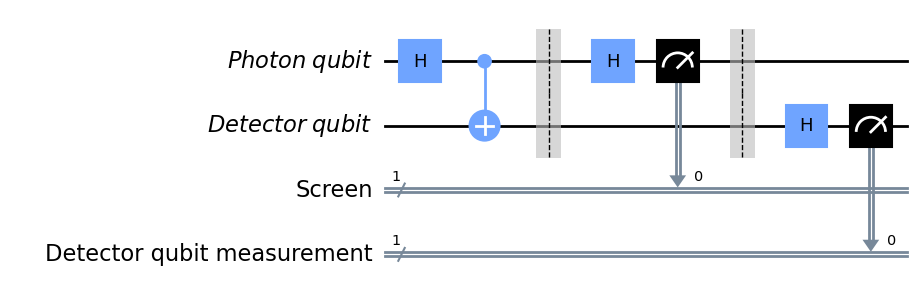

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name="Photon qubit")
qr2 = QuantumRegister(1, name="Detector qubit")
cr1 = ClassicalRegister(1, name="Screen")
cr2 = ClassicalRegister(1, name="Detector qubit measurement")

qc= QuantumCircuit(qr1, qr2, cr1, cr2)
qc.h(0)
qc.cx(0,1)

qc.barrier()

qc.h([0])
qc.measure(0,0)

qc.barrier()

qc.h([1])
qc.measure(1,1)

qc.draw("mpl")

In [8]:
result = backend.run(qc).result()
counts = result.get_counts(qc)
print(counts)

{'1 1': 490, '0 0': 534}


This time we don't retrieve any information about which path the photon took by measuring the detector qubit. However you can see that we get correlations between our results: the detector qubit is always 0 when the photon qubit is 0, and 1 when the photon qubit is 1. This is analogous to separating the points where photons hit the screen into two sets, each individually showing the bright and dark spots characteristic of interference. 

Just like in the interferometer, the two patterns on the screen are exactly out of phase, so the blue pattern is high when the red pattern is low, and vice-versa. This is how they can add up to look like the single-particle pattern with no interference. 

### Resolving the paradox 

So, now we can see what's really happening: 
1. Introducing the detector qubit has the same effect on the measurement outcomes of the photon as putting a classical measurement in between the Hadamard gates does. This means that the detector qubit causes the photon's state to decohere and destroys the interference pattern, regardless of how we measure it later. 
2. Measuring the detector qubit in the Z-basis after the measurement of the photon doesn't change anything about the photon's past behavior. It does project the system into one path or another path, and tells us which path the photon took, with no effect on the measurement of the photon. 
3. Measuring the detector qubit in the X-basis after the measurement of the photon also doesn't change anything about the photon's past behavior. However, because the photon and detector qubit became fully entangled via the CNOT gate, and we are now measuring the photon and detector qubits in the same (X) basis, their outcomes are fully correlated. This is why we can use the outcome of the detector qubit measurement to fully predict the outcome of the photon qubit measurement. It is the entanglement of the photon and detector qubits that gives the illusion of being able to extract a single-photon interference pattern retrospectively in the delayed-choice eraser thought experiment. 

So, it turns out we can't influence the past behavior of the photon after all. It decoheres upon interacting with the detector qubit regardless of how we measure it later, though if we measure it in the X-basis, we can observe the entanglement between the detector qubit and photon qubits via their correlated outcomes. This is the origin of the illusion of single-photon interference in the double-slit quantum eraser: signatures of entanglement were mistaken for signatures of single-photon interference. 

Entanglement doesn't let us affect the past. But can an entangled particle instantly influence its entangled counterpart across space? In the next installment, we'll use quantum circuits to demystify the famous EPR paradox, and show that entanglement can be explained without any instantaneous action-at-a-distance. 